---
title: "Sustainability in Industries Project"
author: "Sophia Stang"
date: 2025-05-16
categories: [python, pandas, selenium] # tags for a blog post (e.g., python)
image: "industry_image.jpeg"

toc: true
---

# Introduction
---

## Background: Provide context for the research questions, explaining why they are significant, relevant, or interesting.

Sustainability in business is related to both environmental and societal effects of the company. Reinforcing sustainability initiatives is helpful in reducing climate change, income inequality, natural resource depletion, and many more important issues in our current world. In addition to this, sustainability is beneficial to the company itself, causing it to outcompete other less sustainable organizations. The benefits of being a sustainable business include protecting your brand, creating a purpose-driven company, and partaking in the growing sustainability market (Chladek, 2019).

##Statement of the Problem: Clearly articulate the specific problem or issue the project will address.

This project aims to determine which sectors and industries are most harmful to the environment and determine the connection between environmental safety and market growth. The project also will test whether environmental safety is related to the public controversy level of the industry.

# Descriptive Statistics
---

Set Up: Import packages and data

In [13]:
import pandas as pd
url_2024 = "https://bcdanl.github.io/data/esg_proj_2024_data.csv"
esg_proj_2024_data = pd.read_csv(url_2024)
url_2025 = "https://bcdanl.github.io/data/esg_proj_2025.csv"
esg_proj_2025 = pd.read_csv(url_2025)
esg_2025_dropd = esg_proj_2025.drop_duplicates(subset = ["Name"])
esg_2024_2025 = pd.merge(esg_2025_dropd, esg_proj_2024_data,on = 'Name', how = 'inner')
url = "https://bcdanl.github.io/data/stock_history_2023.csv"
stock_history_2023 = pd.read_csv(url)
esg_2025 = pd.read_csv("danl_210_stang_sophia_ESG.csv")
stock = pd.read_csv('danl_210_stang_sophia_stock.csv')

In [14]:
stock = stock.drop(columns = "Unnamed: 0")

In [15]:
stock

,Info,Date,Open,High,Low,Close,Adj_close,Symbol
0,"Mar 31, 2025 116.36 117.73 113.76 116.98 116.7...","Mar 31, 2025",116.36,117.73,113.76,116.98,116.73,A
1,"Mar 31, 2025 29.74 30.63 28.80 30.50 30.50 4,9...","Mar 31, 2025",29.74,30.63,28.80,30.50,30.50,AA
2,"Mar 31, 2025 10.41 10.68 10.06 10.55 10.55 66,...","Mar 31, 2025",10.41,10.68,10.06,10.55,10.55,AAL
3,"Mar 31, 2025 38.36 39.65 38.25 39.21 38.91 2,3...","Mar 31, 2025",38.36,39.65,38.25,39.21,38.91,AAP
4,"Mar 31, 2025 217.01 225.62 216.23 222.13 222.1...","Mar 31, 2025",217.01,225.62,216.23,222.13,222.13,AAPL
...,...,...,...,...,...,...,...,...
620,"Mar 31, 2025 118.64 120.11 116.52 119.46 119.4...","Mar 31, 2025",118.64,120.11,116.52,119.46,119.46,XYL
621,"Mar 31, 2025 154.18 158.14 153.61 157.36 157.3...","Mar 31, 2025",154.18,158.14,153.61,157.36,157.36,YUM
622,"Mar 31, 2025 67.54 68.90 66.13 68.56 68.56 2,3...","Mar 31, 2025",67.54,68.90,66.13,68.56,68.56,Z
623,"Mar 31, 2025 111.37 113.64 111.37 113.18 113.1...","Mar 31, 2025",111.37,113.64,111.37,113.18,113.18,ZBH


In [16]:
esg_2025 = esg_2025.drop(columns = ["Unnamed: 0"])

In [17]:
esg_2025

,Year,Symbol,Name,Sector,Industry,Country,Market_Cap,IPO_Year,Total_ESG,Environmental,Social,Governance,Controversy
0,2025,A,Agilent Technologies Inc. Common Stock,Industrials,Biotechnology: Laboratory Analytical Instruments,United States,3.391867e+10,1999.0,13.6,1.1,6.4,6.1,2.0
1,2025,AA,Alcoa Corporation Common Stock,Industrials,Aluminum,United States,8.279121e+09,2016.0,24.0,13.8,5.9,4.3,3.0
2,2025,AAL,American Airlines Group Inc. Common Stock,Consumer Discretionary,Air Freight/Delivery Services,United States,7.325392e+09,NaN,26.4,9.9,11.6,4.8,2.0
3,2025,AAP,Advance Auto Parts Inc.,Consumer Discretionary,Auto & Home Supply Stores,United States,2.413841e+09,NaN,11.5,0.1,8.3,3.1,2.0
4,2025,AAPL,Apple Inc. Common Stock,Technology,Computer Manufacturing,United States,3.362691e+12,1980.0,17.2,0.5,7.4,9.4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,2025,XYL,Xylem Inc. Common Stock New,Industrials,Fluid Controls,United States,2.965650e+10,2011.0,18.1,4.3,8.7,5.2,1.0
621,2025,YUM,Yum! Brands Inc.,Consumer Discretionary,Restaurants,United States,4.400042e+10,NaN,20.1,4.5,11.4,4.1,2.0
622,2025,Z,Zillow Group Inc. Class C Capital Stock,Consumer Discretionary,Business Services,United States,1.706396e+10,NaN,22.2,1.2,11.5,9.5,2.0
623,2025,ZBH,Zimmer Biomet Holdings Inc. Common Stock,Health Care,Industrial Specialties,United States,2.232493e+10,NaN,26.0,3.6,14.5,7.9,2.0


Merge All ESG Data

In [21]:
all_esg = pd.merge(esg_proj_2024_data, esg_2025, on = ["Year", "Symbol", "Name", "Sector", "Industry", "Country", "Market_Cap", "IPO_Year", "Total_ESG", "Environmental", "Social", "Governance", "Controversy"], how = "outer")

In [22]:
all_esg

,Year,Symbol,Name,Sector,Industry,Country,Market_Cap,IPO_Year,Total_ESG,Environmental,Social,Governance,Controversy
0,2024,A,Agilent Technologies Inc. Common Stock,Industrials,Biotechnology: Laboratory Analytical Instruments,United States,4.036543e+10,1999.0,13.6,1.1,6.4,6.1,2.0
1,2024,AA,Alcoa Corporation Common Stock,Industrials,Aluminum,United States,6.622136e+09,2016.0,24.0,13.8,5.9,4.3,3.0
2,2024,AAL,American Airlines Group Inc. Common Stock,Consumer Discretionary,Air Freight/Delivery Services,United States,9.088025e+09,NaN,26.4,9.9,11.6,4.8,2.0
3,2024,AAP,Advance Auto Parts Inc.,Consumer Discretionary,Auto & Home Supply Stores,United States,4.474665e+09,NaN,11.5,0.1,8.3,3.1,2.0
4,2024,AAPL,Apple Inc. Common Stock,Technology,Computer Manufacturing,United States,2.614310e+12,1980.0,17.2,0.5,7.4,9.4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2025,XYL,Xylem Inc. Common Stock New,Industrials,Fluid Controls,United States,2.965650e+10,2011.0,18.1,4.3,8.7,5.2,1.0
1246,2025,YUM,Yum! Brands Inc.,Consumer Discretionary,Restaurants,United States,4.400042e+10,NaN,20.1,4.5,11.4,4.1,2.0
1247,2025,Z,Zillow Group Inc. Class C Capital Stock,Consumer Discretionary,Business Services,United States,1.706396e+10,NaN,22.2,1.2,11.5,9.5,2.0
1248,2025,ZBH,Zimmer Biomet Holdings Inc. Common Stock,Health Care,Industrial Specialties,United States,2.232493e+10,NaN,26.0,3.6,14.5,7.9,2.0


In [26]:
all_esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           1250 non-null   int64  
 1   Symbol         1250 non-null   object 
 2   Name           1250 non-null   object 
 3   Sector         1250 non-null   object 
 4   Industry       1250 non-null   object 
 5   Country        1246 non-null   object 
 6   Market_Cap     1250 non-null   float64
 7   IPO_Year       402 non-null    float64
 8   Total_ESG      1250 non-null   float64
 9   Environmental  1204 non-null   float64
 10  Social         1204 non-null   float64
 11  Governance     1204 non-null   float64
 12  Controversy    1146 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 127.1+ KB


In [57]:
sectors = all_esg.groupby('Sector')["Total_ESG"].mean()

In [63]:
sectors_df = pd.DataFrame(sectors)
sectors_df.sort_values("Total_ESG", ascending = False)

,Total_ESG
Sector,
Energy,32.788000
Utilities,26.547619
Consumer Staples,26.359091
Industrials,23.678947
Health Care,22.815789
Finance,21.754737
Basic Materials,21.750000
Telecommunications,20.406250
Consumer Discretionary,19.588158


In [68]:
energy = all_esg['Sector'] == "Energy"
energy = all_esg[energy]
industry_esg = energy.groupby("Industry")["Total_ESG"].mean()
industry_esg

,Total_ESG
Industry,
Integrated oil Companies,34.788889
Natural Gas Distribution,21.100000
Oil & Gas Production,33.815385
Oilfield Services/Equipment,22.950000


In [69]:
industry_market_cap = energy.groupby("Industry")["Market_Cap"].mean()
industry_market_cap

,Market_Cap
Industry,
Integrated oil Companies,1.372203e+11
Natural Gas Distribution,8.637729e+10
Oil & Gas Production,2.829162e+10
Oilfield Services/Equipment,4.644217e+10


In [70]:
Controv_env = all_esg.groupby("Controversy")["Environmental"].mean()
Controv_env

,Environmental
Controversy,
0.0,5.560000
1.0,5.136076
2.0,5.857762
3.0,6.397030
4.0,6.778571
5.0,9.600000


## Exploratory Analysis Data Visualization

---



In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

What sectors have the highest ESG scores and why might that be? How does that change across years?

<Axes: xlabel='Total_ESG', ylabel='Sector'>

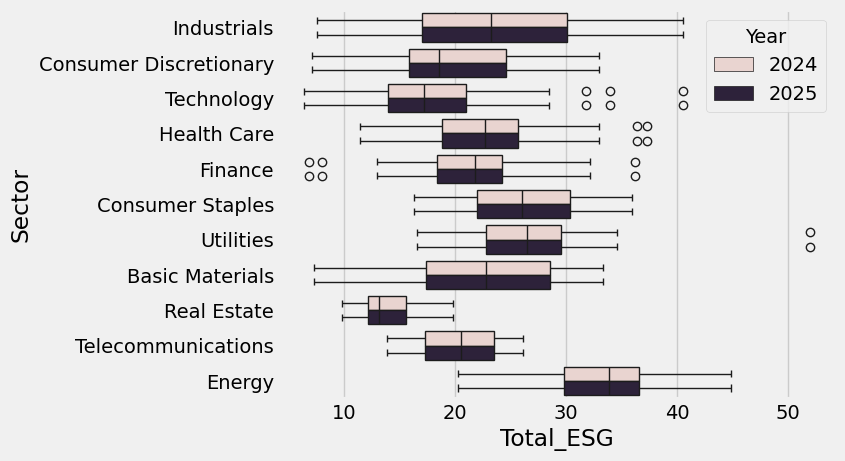

In [ ]:
sns.boxplot(data = all_esg,
            y = 'Sector',
            x = 'Total_ESG',
            hue = 'Year')

In [29]:
energy = all_esg['Sector'] == "Energy"
energy = all_esg[energy]

What energy industries in the Energy Sector have the worst ESG scores?

<Axes: xlabel='Total_ESG', ylabel='Industry'>

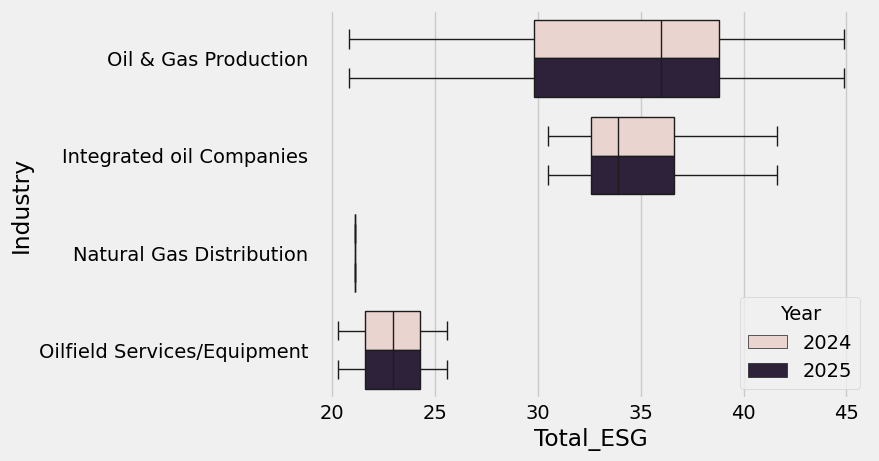

In [71]:
sns.boxplot(data = energy,
            y = 'Industry',
            x = 'Total_ESG',
            hue = 'Year')

What are the market capitalizations of energy industries?

<Axes: xlabel='Market_Cap', ylabel='Industry'>

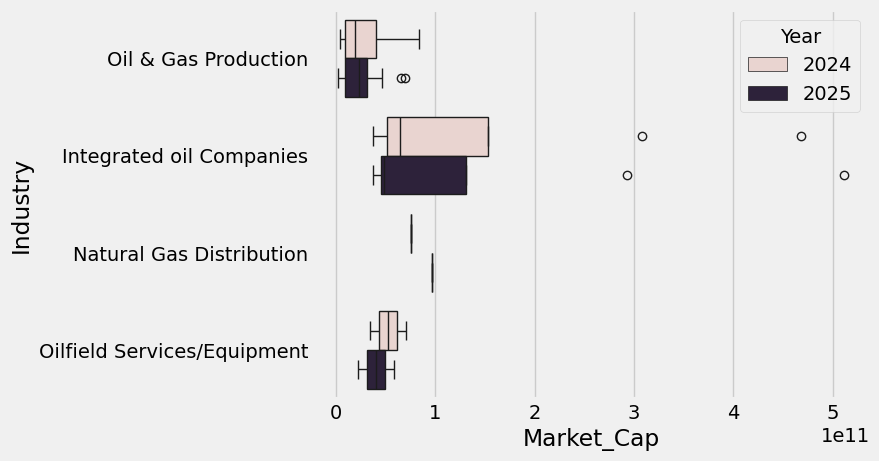

In [48]:
sns.boxplot(data = energy,
            y = 'Industry',
            x = 'Market_Cap',
            hue = 'Year')

What is the relationship between ESG scores and market growth?

<Axes: xlabel='Total_ESG', ylabel='Market_Cap'>

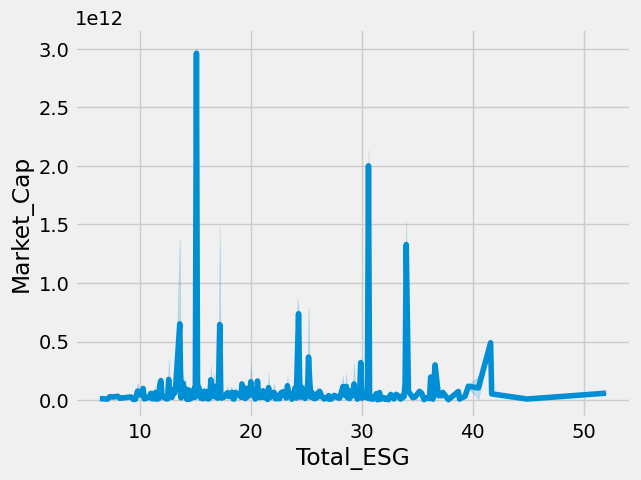

In [50]:
sns.lineplot(data = all_esg,
            x = 'Total_ESG',
            y = 'Market_Cap')

Is there a clear relationship between environmental scores and controversy scores?

<Axes: xlabel='Controversy', ylabel='Environmental'>

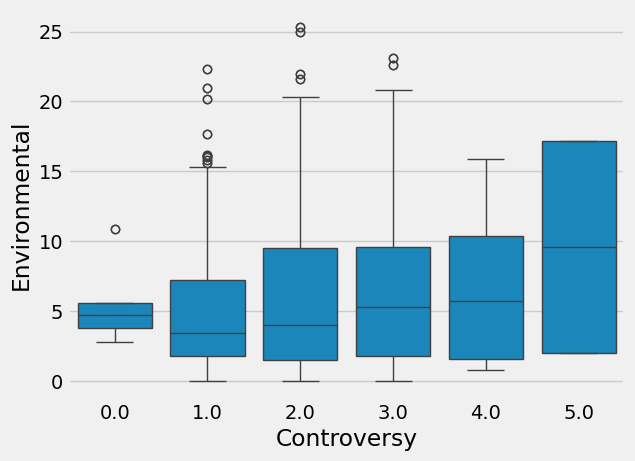

In [51]:
sns.boxplot(data = all_esg,
            x = 'Controversy',
            y = 'Environmental')

# Significance of the Project
---

The energy sector showed the highest ESG risk with an average score of 32.788. Among this sector, oil and gas production and integrated oil companies had the highest ESG scores. This is important because it shows that among the least sustainable sector, oil and gas are the least sustainable energy sources. Oil and gas production also showed the lowest market capitalization, demonstrating that its stock value is decreasing. This may drive more investment into more sustainable energy sources, and more investment into technology to develop them.

ESG scores and market capitalization did not show a clear relationship, however the highest market capitalizations were found at a low ESG score of about 15, suggesting that there is more value in more sustainable companies. This may be a result of the controversy levels and their relationship with envirnomental concerns. At very low levels of constroversy, environmental risks were consistently low. At very high levels of controversy, environmental risks showed a large range, but with the highest mean environmental risk score.

 By supporting workers with equity, supporting environmental causes, and reducing environmental risk, industries will perform better. This information can also inform stockholders to invest in developing sustainable alternatives to harmful oil and gas production methods. This is important because it shows that to do well, a company must do right by the people and the planet.

# References
---

https://online.hbs.edu/blog/post/business-sustainability-strategies

Malene Comeau collaborated on sections data collection, project statement, some descriptive statistics, and some exploratory analysis.

Copilot was used to attempt to clean the stock data.